In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

import xml
import os
import json
from pathlib import Path

In [12]:
DATASETS_PATH = "../datasets/General Dataset/"
DATASET_IMAGES_PATH = DATASETS_PATH + "Orig_Image/"

In [13]:
def imshow(image, fac=50):
    fig = plt.figure(figsize=(image.shape[0]/fac, image.shape[1]/fac))
    ax = fig.add_subplot()
    ax.imshow(image)
    ax.set_xticks([])
    ax.set_yticks([])

In [14]:
list(Path(DATASET_IMAGES_PATH).glob("*"))[:10]

[PosixPath('../datasets/General Dataset/Orig_Image/cTDaR_t10296.jpg'),
 PosixPath('../datasets/General Dataset/Orig_Image/9521_052.png'),
 PosixPath('../datasets/General Dataset/Orig_Image/cTDaR_t10037.jpg'),
 PosixPath('../datasets/General Dataset/Orig_Image/1852_095.png'),
 PosixPath('../datasets/General Dataset/Orig_Image/1896_414.png'),
 PosixPath('../datasets/General Dataset/Orig_Image/cTDaR_t10127.jpg'),
 PosixPath('../datasets/General Dataset/Orig_Image/10.1.1.180.553_12.jpg'),
 PosixPath('../datasets/General Dataset/Orig_Image/55_300.jpg'),
 PosixPath('../datasets/General Dataset/Orig_Image/10.1.1.1.2034_11.jpg'),
 PosixPath('../datasets/General Dataset/Orig_Image/10.1.1.1.2084_16.jpg')]

In [15]:
df_an = pd.read_csv("annotations.csv")

In [16]:
df_an.head()

,area,bbox,category_id,ignore,image_id,iscrowd,segmentation,file_name,width,height
0,202208.0,"[112, 93, 568, 356]",1,0,1,0,"[[112, 93, 112, 449, 680, 449, 680, 93]]",cTDaR_t10000.jpg,794.0,1059.0
1,69993.0,"[43, 174, 707, 99]",1,0,2,0,"[[43, 174, 43, 273, 750, 273, 750, 174]]",cTDaR_t10001.jpg,794.0,1123.0
2,43834.0,"[43, 345, 707, 62]",1,0,2,0,"[[43, 345, 43, 407, 750, 407, 750, 345]]",cTDaR_t10001.jpg,794.0,1123.0
3,79184.0,"[43, 445, 707, 112]",1,0,2,0,"[[43, 445, 43, 557, 750, 557, 750, 445]]",cTDaR_t10001.jpg,794.0,1123.0
4,50904.0,"[43, 692, 707, 72]",1,0,2,0,"[[43, 692, 43, 764, 750, 764, 750, 692]]",cTDaR_t10001.jpg,794.0,1123.0


In [17]:
len(df_an["file_name"].unique())

1932

In [18]:
# no nan fields
np.any(df_an.isna())

False

In [19]:
df_an.corr()

,area,category_id,ignore,image_id,iscrowd,width,height
area,1.000000,NaN,NaN,0.463210,NaN,0.729685,0.694929
category_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ignore,NaN,NaN,NaN,NaN,NaN,NaN,NaN
image_id,0.463210,NaN,NaN,1.000000,NaN,0.587485,0.601015
iscrowd,NaN,NaN,NaN,NaN,NaN,NaN,NaN
width,0.729685,NaN,NaN,0.587485,NaN,1.000000,0.964230
height,0.694929,NaN,NaN,0.601015,NaN,0.964230,1.000000


In [20]:
df_an.describe()

,area,category_id,ignore,image_id,iscrowd,width,height
count,2.835000e+03,2835.0,2835.0,2835.000000,2835.0,2835.000000,2835.000000
mean,4.579087e+05,1.0,0.0,930.483951,0.0,1073.518871,1401.785891
std,9.813967e+05,0.0,0.0,562.454205,0.0,724.363989,841.382979
min,1.890000e+03,1.0,0.0,1.000000,0.0,418.000000,503.000000
25%,6.443300e+04,1.0,0.0,434.500000,0.0,793.000000,1056.000000
50%,1.237280e+05,1.0,0.0,914.000000,0.0,794.000000,1059.000000
75%,2.881200e+05,1.0,0.0,1406.500000,0.0,816.000000,1124.000000
max,5.842444e+06,1.0,0.0,1934.000000,0.0,3312.000000,3312.000000


In [21]:
df_an

,area,bbox,category_id,ignore,image_id,iscrowd,segmentation,file_name,width,height
0,202208.0,"[112, 93, 568, 356]",1,0,1,0,"[[112, 93, 112, 449, 680, 449, 680, 93]]",cTDaR_t10000.jpg,794.0,1059.0
1,69993.0,"[43, 174, 707, 99]",1,0,2,0,"[[43, 174, 43, 273, 750, 273, 750, 174]]",cTDaR_t10001.jpg,794.0,1123.0
2,43834.0,"[43, 345, 707, 62]",1,0,2,0,"[[43, 345, 43, 407, 750, 407, 750, 345]]",cTDaR_t10001.jpg,794.0,1123.0
3,79184.0,"[43, 445, 707, 112]",1,0,2,0,"[[43, 445, 43, 557, 750, 557, 750, 445]]",cTDaR_t10001.jpg,794.0,1123.0
4,50904.0,"[43, 692, 707, 72]",1,0,2,0,"[[43, 692, 43, 764, 750, 764, 750, 692]]",cTDaR_t10001.jpg,794.0,1123.0
...,...,...,...,...,...,...,...,...,...,...
2830,306810.0,"[242, 739, 974, 315]",1,0,1933,0,"[[242, 739, 242, 1054, 1216, 1054, 1216, 739]]",9573_040.png,2552.0,3300.0
2831,436590.0,"[1303, 419, 990, 441]",1,0,1933,0,"[[1303, 419, 1303, 860, 2293, 860, 2293, 419]]",9573_040.png,2552.0,3300.0
2832,405552.0,"[238, 1657, 994, 408]",1,0,1933,0,"[[238, 1657, 238, 2065, 1232, 2065, 1232, 1657]]",9573_040.png,2552.0,3300.0
2833,297070.0,"[1321, 2391, 974, 305]",1,0,1933,0,"[[1321, 2391, 1321, 2696, 2295, 2696, 2295, 23...",9573_040.png,2552.0,3300.0


In [22]:
for i in df_an[df_an["file_name"] == "cTDaR_t10001.jpg"].iterrows():
    print(i[1]["bbox"])

[43, 174, 707, 99]
[43, 345, 707, 62]
[43, 445, 707, 112]
[43, 692, 707, 72]


In [23]:
def anshow(name, fac=50):
    img = cv2.imread(DATASET_IMAGES_PATH + name)
    for i, sample in df_an[df_an["file_name"] == name].iterrows():
        # print(sample)
        x, y, w, h = eval(sample["bbox"])
        seg = eval(sample["segmentation"])
        # print(seg)
        print(x, y, w, h)
        # img[x1:x2-x1, y1:y2-y1] = 0
        img = cv2.rectangle(img, (x, y), (x+w, y+h), color=(0, 0, 255), thickness=2)
        break
    imshow(img, fac)

In [24]:
df_an.iloc[0]["bbox"]

'[112, 93, 568, 356]'

In [25]:
anshow("9573_040.png", fac=10)

242 739 974 315


In [26]:
MASKS_DIR = DATASETS_PATH + "Orig_Masks/"

In [30]:
def save_mask(name):
    img = cv2.imread(DATASET_IMAGES_PATH + name)
    mask = np.zeros((img.shape[0], img.shape[1]))

    for i, sample in df_an[df_an["file_name"] == name].iterrows():
        # print(sample)
        x, y, w, h = eval(sample["bbox"])
        # print(seg)
        # img[x1:x2-x1, y1:y2-y1] = 0
        mask[y:y+h, x:x+w] = 255
        # img = cv2.rectangle(img, (x, y), (x+w, y+h), color=(0, 0, 255), thickness=2)

    ext = name.split(".")[-1]
    base_name = ".".join(name.split(".")[:-1])
    cv2.imwrite(MASKS_DIR + base_name + "_mask." + ext, mask)

In [31]:
save_mask("cTDaR_t10000.jpg")

In [32]:
for i, name in enumerate(df_an["file_name"].unique()):
    print(f"Saving {i}.", end='\r')
    save_mask(name)

### Converting the json annotations to csv.

In [212]:
with open(DATASETS_PATH + "orig.json", "r") as f:
    ds_annotations = json.load(f)

In [213]:
list(ds_annotations.keys())

['annotations', 'categories', 'images', 'type']

In [214]:
for i, item in enumerate(ds_annotations['annotations']):
    if item["id"] != i+1:
        print(f"Item not equal: {item}.")

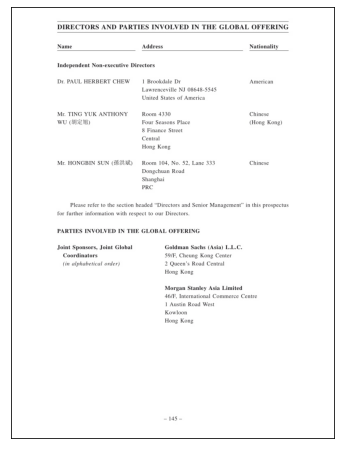

In [137]:
imshow(cv2.imread(DATASET_IMAGES_PATH + ds_annotations["images"][0]["file_name"]), fac=100)

In [216]:
len(ds_annotations["images"]), len(ds_annotations["annotations"])

(1934, 2835)

In [217]:
core_data = {k : [] for k in ds_annotations["annotations"][0].keys()}
for el in ds_annotations["annotations"]:
    for k, v in el.items():
        core_data[k].append(v)

# df_annotations = pd.DataFrame(
#     index=[el["id"] for el in ds_annotations["images"]]
    
# )

In [218]:
for v in core_data.values():
    print(len(v))

2835
2835
2835
2835
2835
2835
2835
2835


In [219]:
len([v for v in core_data.values()])

8

In [220]:
df_annotations = pd.DataFrame(
    index=[el['id'] for el in ds_annotations["annotations"]],
)

In [221]:
for k, v in core_data.items():
    df_annotations[k] = v

In [133]:
df_annotations["file_name"] = np.nan
df_annotations["width"] = np.nan
df_annotations["height"] = np.nan

In [134]:
df_annotations.head()

,area,bbox,category_id,id,ignore,image_id,iscrowd,segmentation,file_name,width,height
1,202208.0,"[112, 93, 568, 356]",1,1,0,1,0,"[[112, 93, 112, 449, 680, 449, 680, 93]]",NaN,NaN,NaN
2,69993.0,"[43, 174, 707, 99]",1,2,0,2,0,"[[43, 174, 43, 273, 750, 273, 750, 174]]",NaN,NaN,NaN
3,43834.0,"[43, 345, 707, 62]",1,3,0,2,0,"[[43, 345, 43, 407, 750, 407, 750, 345]]",NaN,NaN,NaN
4,79184.0,"[43, 445, 707, 112]",1,4,0,2,0,"[[43, 445, 43, 557, 750, 557, 750, 445]]",NaN,NaN,NaN
5,50904.0,"[43, 692, 707, 72]",1,5,0,2,0,"[[43, 692, 43, 764, 750, 764, 750, 692]]",NaN,NaN,NaN


In [135]:
image_data = {}
image_data['id'] = []
image_data["file_name"] = []
image_data["height"] = []
image_data["width"] = []

for el in ds_annotations["images"]:
    for k, v in el.items():
        image_data[k].append(v)


In [148]:
import copy

In [160]:
len(ds_annotations)

4

In [169]:
for el in ds_annotations["images"]:
    for i in range(len(df_annotations)):
        if df_annotations['image_id'].iloc[i] == el['id']:
            df_annotations["file_name"].iloc[i] = el["file_name"]
            df_annotations["width"].iloc[i] = el["width"]
            df_annotations["height"].iloc[i] = el["height"]

/tmp/ipykernel_14720/3979633670.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_annotations["file_name"].iloc[i] = el["file_name"]
/tmp/ipykernel_14720/3979633670.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_annotations["width"].iloc[i] = el["width"]
/tmp/ipykernel_14720/3979633670.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_annotations["height"].iloc[i] = el["height"]


In [170]:
df_annotations

,area,bbox,category_id,id,ignore,image_id,iscrowd,segmentation,file_name,width,height
1,202208.0,"[112, 93, 568, 356]",1,1,0,1,0,"[[112, 93, 112, 449, 680, 449, 680, 93]]",cTDaR_t10000.jpg,794.0,1059.0
2,69993.0,"[43, 174, 707, 99]",1,2,0,2,0,"[[43, 174, 43, 273, 750, 273, 750, 174]]",cTDaR_t10001.jpg,794.0,1123.0
3,43834.0,"[43, 345, 707, 62]",1,3,0,2,0,"[[43, 345, 43, 407, 750, 407, 750, 345]]",cTDaR_t10001.jpg,794.0,1123.0
4,79184.0,"[43, 445, 707, 112]",1,4,0,2,0,"[[43, 445, 43, 557, 750, 557, 750, 445]]",cTDaR_t10001.jpg,794.0,1123.0
5,50904.0,"[43, 692, 707, 72]",1,5,0,2,0,"[[43, 692, 43, 764, 750, 764, 750, 692]]",cTDaR_t10001.jpg,794.0,1123.0
...,...,...,...,...,...,...,...,...,...,...,...
2831,306810.0,"[242, 739, 974, 315]",1,2831,0,1933,0,"[[242, 739, 242, 1054, 1216, 1054, 1216, 739]]",9573_040.png,2552.0,3300.0
2832,436590.0,"[1303, 419, 990, 441]",1,2832,0,1933,0,"[[1303, 419, 1303, 860, 2293, 860, 2293, 419]]",9573_040.png,2552.0,3300.0
2833,405552.0,"[238, 1657, 994, 408]",1,2833,0,1933,0,"[[238, 1657, 238, 2065, 1232, 2065, 1232, 1657]]",9573_040.png,2552.0,3300.0
2834,297070.0,"[1321, 2391, 974, 305]",1,2834,0,1933,0,"[[1321, 2391, 1321, 2696, 2295, 2696, 2295, 23...",9573_040.png,2552.0,3300.0


In [173]:
df_annotations.pop("id")

In [174]:
sum(df_annotations["width"].isna())

0

In [182]:
df_annotations.to_csv("annotations.csv", index=False)